## Training a Linear Regression Model

Linear Regression equation: y = wx + b  
Least Squares: yᵢ = w0 + w1*xᵢ+εᵢ  
The objective is to minimize the sum of squared errors: Minimize : ∑(yᵢ-yᵢ^)**2   

based on: https://medium.com/@pritioli/implementing-linear-regression-from-scratch-747343634494

In [1]:
## based on gradient descent
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt


def initialize(dim):
  w1 = np.random.rand(dim)
  w0 = np.random.rand()
  return w1, w0

def compute_cost(X,Y, y_hat):
    m = len(Y)
    cost = (1/(2*m)) * np.sum(np.square(y_hat - Y))
    return cost

def predict_y(X,w1,w0):
  if len(w1)==1:
    w1 = w1[0]
    return X*w1+w0
  return np.dot(X,w1)+w0


def update_parameters(X,Y,y_hat,cost,w0,w1,learning_rate):
  m = len(Y)
  db=(np.sum(y_hat-Y))/m
  dw=np.dot(y_hat-Y,X)/m

  w0_new=w0-learning_rate*db
  w1_new=w1-learning_rate*dw
  return w0_new,w1_new


def run_gradient_descent(X,Y,alpha,max_iterations,stopping_threshold = 1e-6):
    dims = 1
    if len(X.shape)>1:
        dims = X.shape[1]
    w1,w0=initialize(dims)
    previous_cost = None
    cost_history = np.zeros(max_iterations)
    w0_history = np.zeros(max_iterations)
    w1_history = np.zeros(max_iterations)

    for itr in range(max_iterations):
        y_hat=predict_y(X,w1,w0)
        cost=compute_cost(X,Y,y_hat)
        # early stopping criteria
        if previous_cost and abs(previous_cost-cost)<=stopping_threshold:
          break
        cost_history[itr]=cost
        w0_history[itr]=w0
        w1_history[itr]=w1
        previous_cost = cost
        old_w1=w1
        old_w0=w0
        w0,w1=update_parameters(X,Y,y_hat,cost,old_w0,old_w1,alpha)

    return w0,w1,cost_history, w0_history, w1_history

def plot_cost_history(cost_history):
    plt.plot(range(1, iterations + 1), cost_history, color='blue')
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.grid()
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost (J)')
    plt.title('Convergence of gradient descent')
    plt.show()

    
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color='red')

    
def plot_fit(data, w1, w0, cost, itr, pdf=0):
    cost = round(cost,2)
    plt.scatter(x=data.temp_c, y=data.temp_f)
    abline(w1, w0)
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.grid()
    plt.xlabel('Temperature in Celcius')
    plt.ylabel('Temperature in Fahrenheit')
    plt.title(f'Model Fit at iteration {itr + 1}')
    plt.text(-50, 250, f'Calculated Cost = {cost}', fontsize=14, color='red')
    if pdf:
        plt.savefig(f"plot_fit_itr_{itr+1}.pdf", format="pdf", bbox_inches="tight")
    plt.show()

def plot_actual_predicted(x, y, y_hat):
    plt.scatter(x, y, label='Observed Value')
    plt.scatter(x, y_hat, label='Predicted Value', color='red')
    plt.xlabel('<--X-Axis-->')
    plt.ylabel('<--Y-Axis-->')
    plt.legend()
    plt.show()
    
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for y, y_hat in zip(actual,predicted) :
        prediction_error = y - y_hat
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

def evaluate_ols(y,y_hat):
    mse = np.mean((y - y_hat) ** 2)
    return mse,np.sqrt(mse)


In [2]:
## try on Celius to F exmaple

import pandas as pd

data_file= "temperatures.csv"
data = pd.read_csv(data_file, header=None)
data.columns = ["temp_c", "temp_f"]


In [3]:
# explore the dataset:
print("File contains: ", data.shape)
data.describe()

File contains:  (300, 2)


,temp_c,temp_f
count,300.000000,300.000000
mean,38.406667,101.682000
std,47.560853,87.084671
min,-43.000000,-71.600000
25%,-0.250000,30.450000
50%,38.000000,96.500000
75%,80.250000,175.500000
max,120.000000,273.400000


In [13]:
learning_rate = 0.0001
iterations = 10

w0,w1,cost_history, w0_history, w1_history = run_gradient_descent(data.temp_c,data.temp_f,learning_rate,iterations)


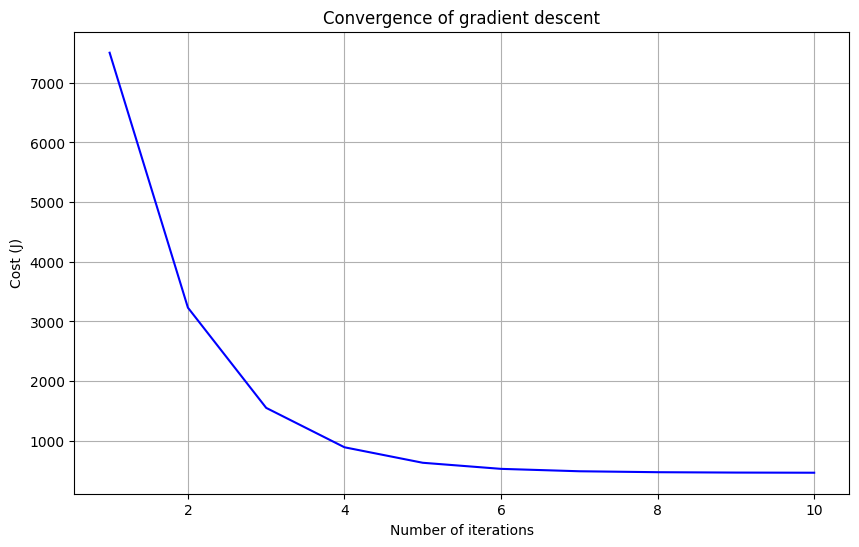

In [14]:
plot_cost_history(cost_history)

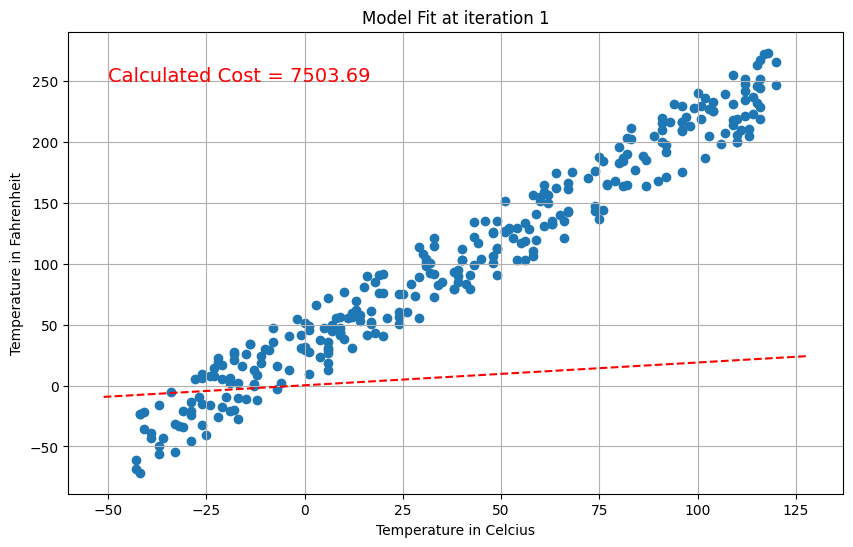

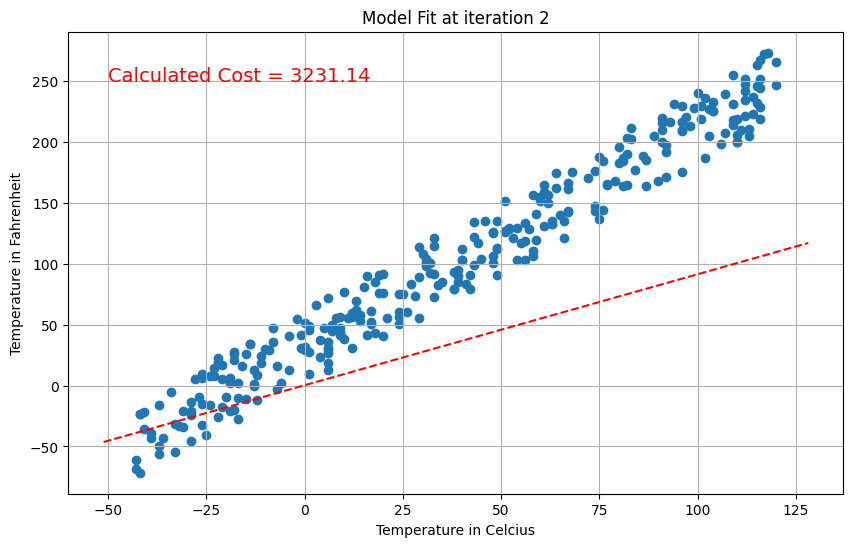

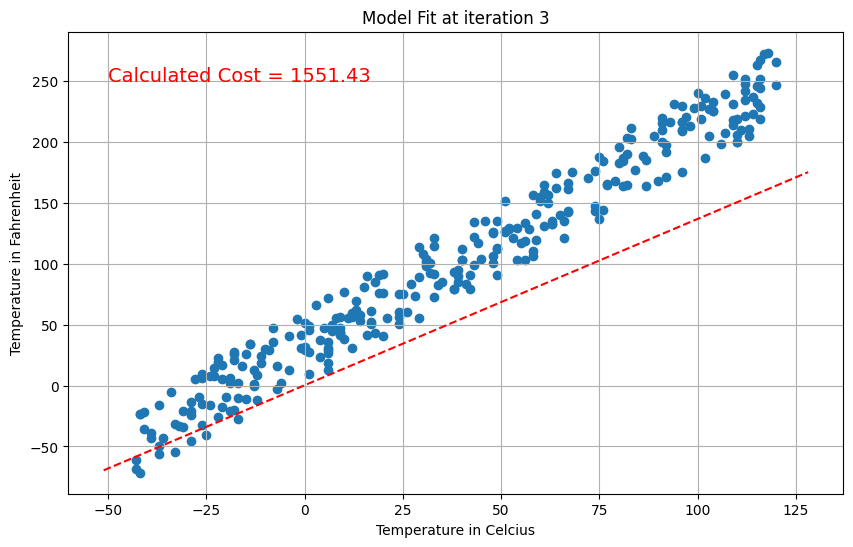

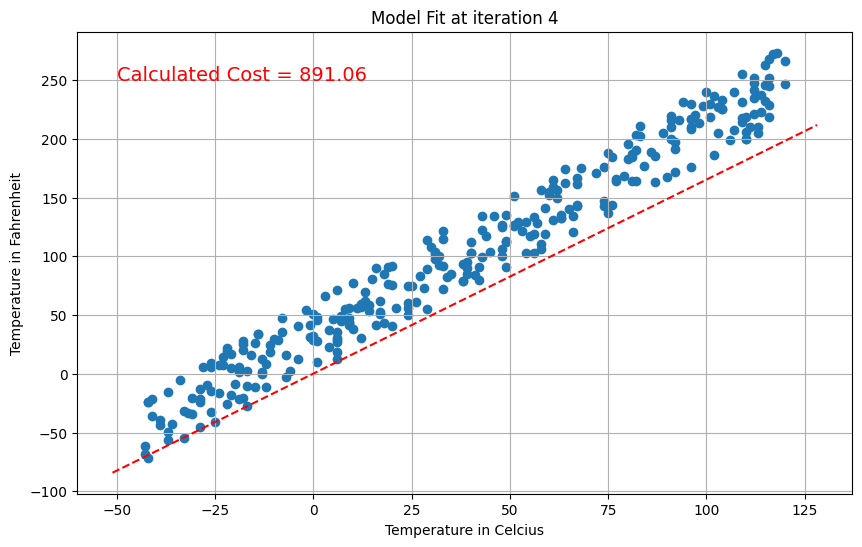

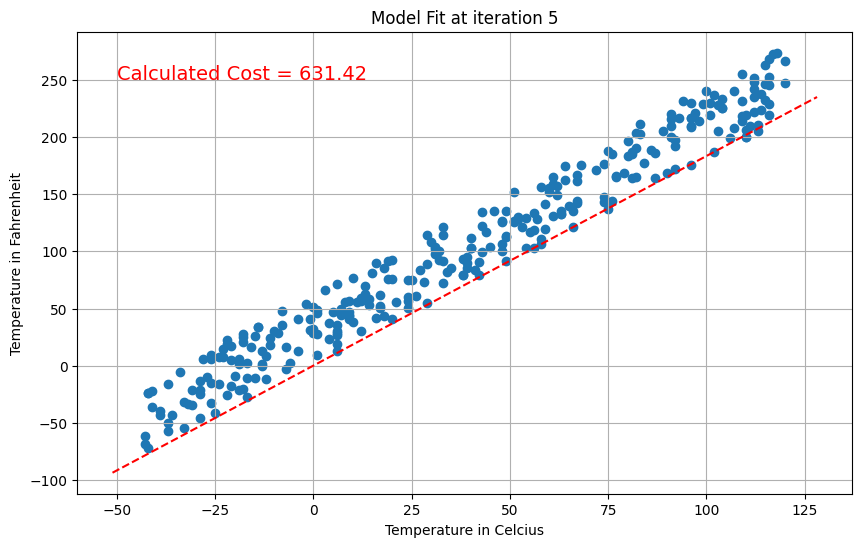

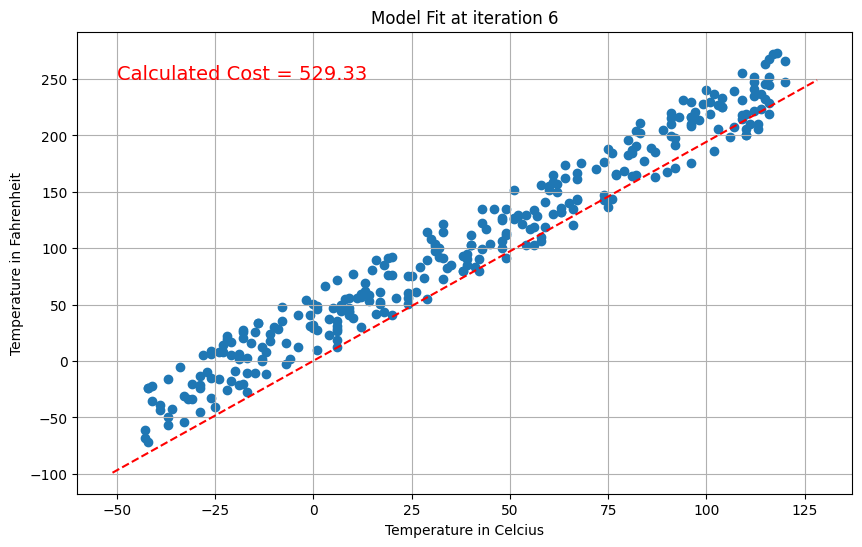

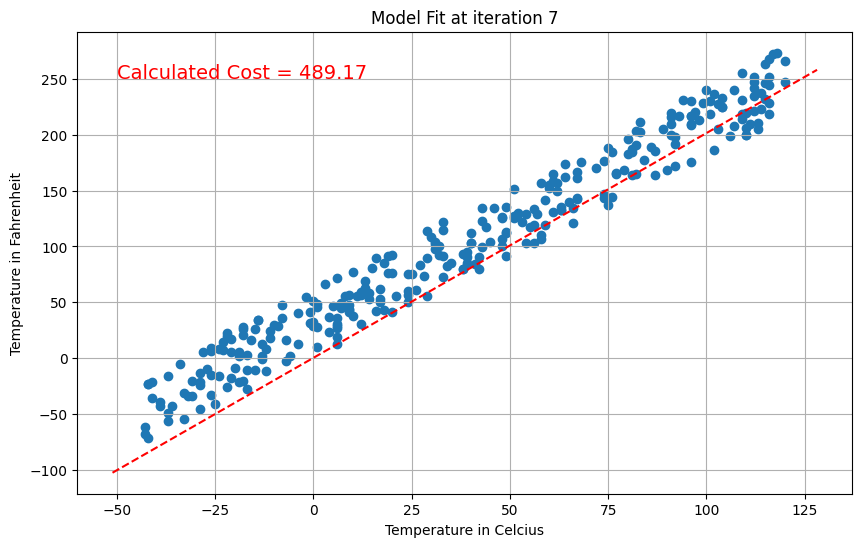

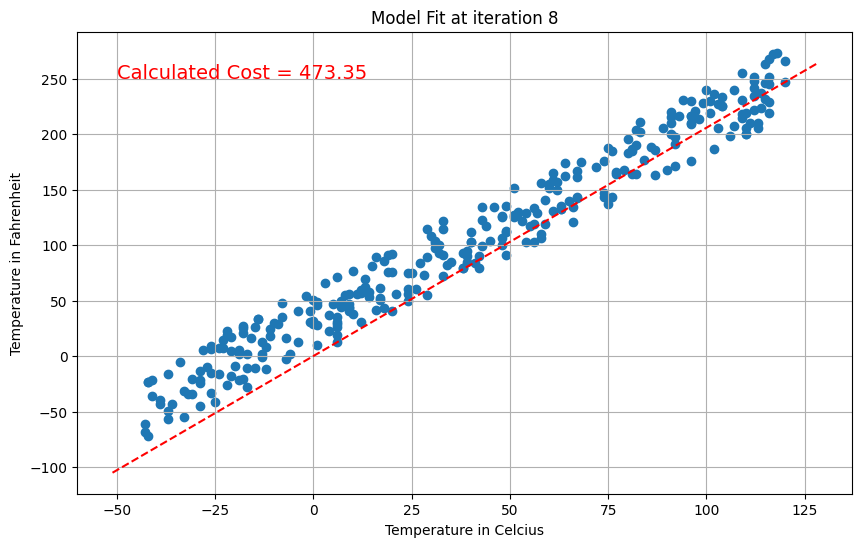

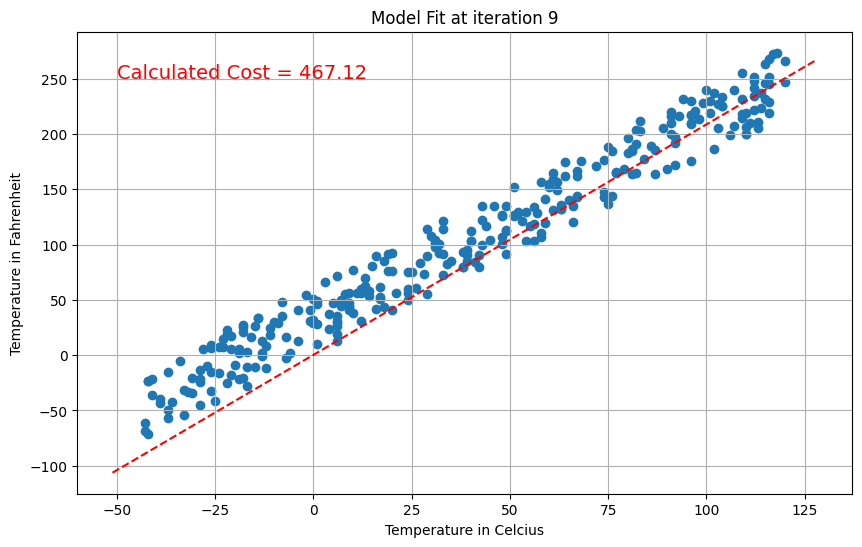

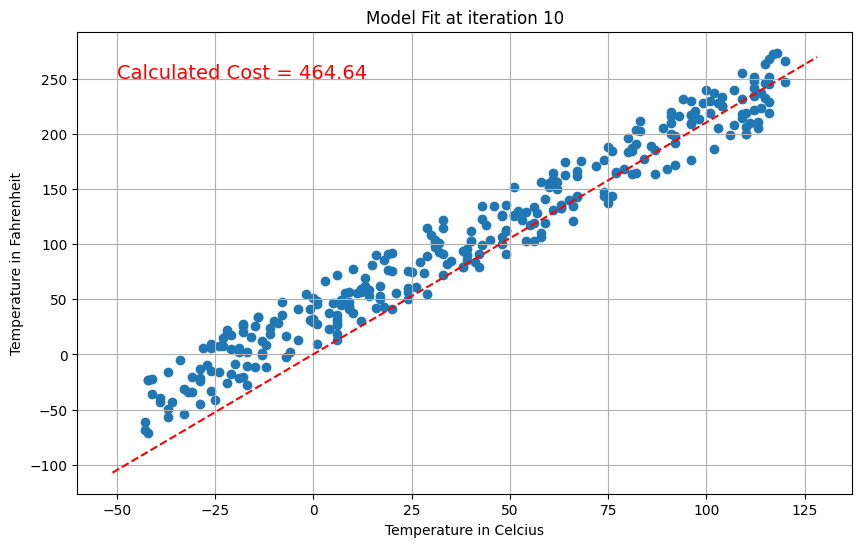

In [15]:
for itr in range(0, iterations):
    #plt.rcParams['figure.figsize'] = [5, 5]
    plot_fit(data, w1_history[itr], w0_history[itr], cost_history[itr], itr, pdf=1)

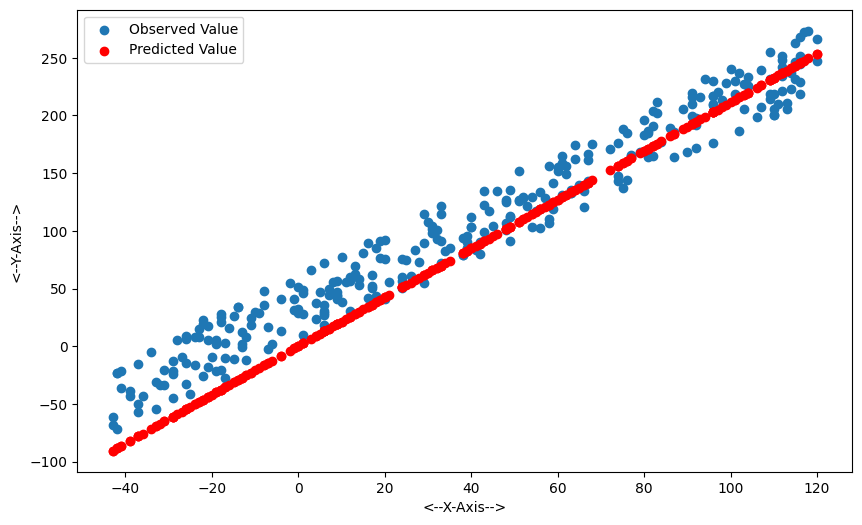

In [16]:
# actual vs predicted values:
y_hat = predict_y(data.temp_c,w1,w0)
plot_actual_predicted(data.temp_c, data.temp_f, y_hat)